# EMIBA - PANDAS WORKSHOP

#### AGENDA:
1. Basic attributes of a dataframe
2. Selecting and filtering data
3. Groupby operation
5. Brief Exercise
6. Groupby & merge

For data-intensive work in Python the [Pandas](http://pandas.pydata.org) library has become essential.

What is `pandas`?

* Pandas can be thought of as *NumPy arrays with labels* for rows and columns, and better support for heterogeneous data types, but it's also much, much more than that.
* Powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...

It's documentation: http://pandas.pydata.org/pandas-docs/stable/


**When do you need pandas?**

When working with **tabular or structured data** (SQL table, Excel spreadsheet, ...):

- Import data
- Clean up messy data
- Explore data, gain insight into data
- Process and prepare your data for analysis
- Analyse your data (together with scikit-learn, statsmodels, ...)

Pandas is commonly imported as pd in order to be able to reuse code we recommend always following the available naming convention:

In [2]:
import pandas as pd
import numpy as np

**We will use the titanic data:**

**Overview**
* `PassengerId` is the unique id of the row and it doesn't have any effect on target
* `Survived` is the target variable we are trying to predict (**0** or **1**):
    - **1 = Survived**
    - **0 = Not Survived**
* `Pclass` (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has **3** unique values (**1**,  **2 **or **3**):
    - **1 = Upper Class**
    - **2 = Middle Class**
    - **3 = Lower Class**
* `Name`, `Sex` and `Age` are self-explanatory
* `SibSp` is the total number of the passengers' siblings and spouse
* `Parch` is the total number of the passengers' parents and children
* `Ticket` is the ticket number of the passenger
* `Fare` is the passenger fare
* `Cabin` is the cabin number of the passenger
* `Embarked` is port of embarkation and it is a categorical feature which has **3** unique values (**C**, **Q** or **S**):
    - **C = Cherbourg**
    - **Q = Queenstown**
    - **S = Southampton**

In [3]:
df = pd.read_csv("titanic.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1. Basic exploration

A DataFrame has besides a `index` attribute, also a `columns` attribute:

In [5]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

To check the data types of the different columns:

In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

An overview of that information can be given with the `info()` method:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can obtain statistics on numerical columns using describe:

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

We can also count the number of occurrences in each category:

In [13]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Or see how many different values are in a column:

In [14]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [15]:
df['Cabin'].nunique()

147

A one column dataframe is a **Series**, it is really similar to a numpy array with some subtle differences but you can already apply what you have learnt in the first Datacamp course.

In [16]:
df['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [17]:
fare = df['Fare']

Here we create a Series containing the Fare each passenger paid and we can calculate the maximum or minimum fare or the mean and an histogram:

In [18]:
fare.max()

512.3292

In [19]:
fare.min()

0.0

In [20]:
fare.mean()

32.204207968574636

<Axes: >

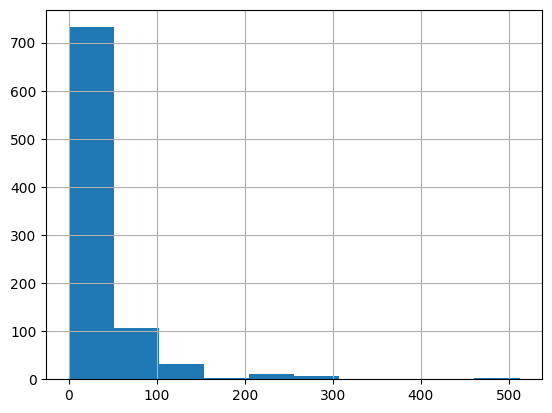

In [21]:
fare.hist()

<Axes: >

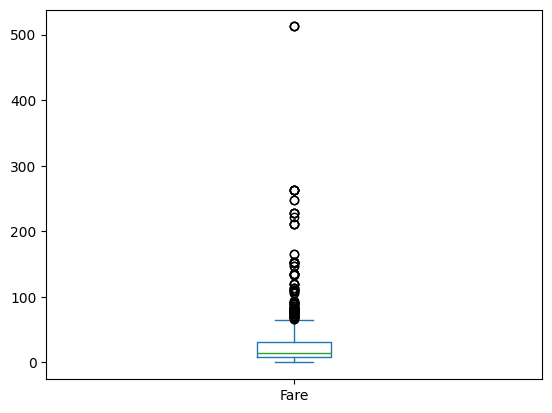

In [22]:
fare.plot(kind = 'box')

<Axes: ylabel='Frequency'>

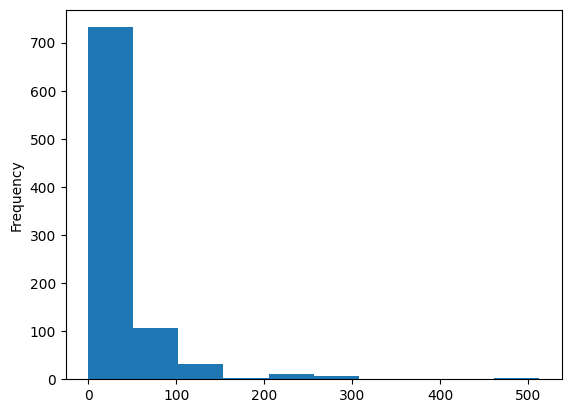

In [23]:
fare.plot(kind='hist')

#### Other plots
Plotting methods allow for a handful of plot styles other than the default line plot. These methods can be provided as the kind keyword argument to plot(), and include:

- ‘bar’ or ‘barh’ for bar plots
- ‘hist’ for histogram
- ‘box’ for boxplot
- ‘kde’ or ‘density’ for density plots
- ‘area’ for area plots
- ‘scatter’ for scatter plots
- ‘hexbin’ for hexagonal bin plots
- ‘pie’ for pie plots

### 2. Selecting and filtering data

**ATTENTION!**
One of pandas basic features is the labeling of rows and columns, but this makes indexing also a bit more complex compared to numpy. 

We now have to distuinguish between:

 <ul>
  <li>selection by **label**</li>
  <li>selection by **position**</li>
</ul>
</div>

For a DataFrame, basic indexing selects the columns.

Selecting a single column:

In [24]:
df['Age'] 

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

or multiple columns:

In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
df2 = df[['Parch', 'Ticket','Cabin']]

In [27]:
df2.head()

,Parch,Ticket,Cabin
0,0,A/5 21171,NaN
1,0,PC 17599,C85
2,0,STON/O2. 3101282,NaN
3,0,113803,C123
4,0,373450,NaN


However, slicing accesses the rows:

In [28]:
df[2:6]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


We can drop columns:

In [29]:
df.drop(['Cabin','Fare'],axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,C


Or rows:

In [30]:
df.drop(df.index[0:100],axis=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
101,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
103,104,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [31]:
df.drop([0,3,4,890],axis=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


We can even add new columns:

In [32]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [33]:
df['New'] = df['Name']+df['Cabin']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)C123"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


#### Systematic indexing with `loc` and `iloc`

When using `[]` like above, you can only select from one axis at once (rows or columns, not both). For more advanced indexing, you have some extra attributes:
    
* `loc`: selection by label
* `iloc`: selection by position

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)C123"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [35]:
fare_first_passenger = df.loc[0, 'Fare']

In [36]:
fare_first_passenger

7.25

We can set de index in order to have easier filtering:

In [37]:
df = df.set_index('Name')

In [38]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New
Name,,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)C123"
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [39]:
df.loc['Heikkinen, Miss. Laina', 'Ticket'] = 'ABCD1234'

In [40]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New
Name,,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,ABCD1234,7.9250,NaN,S,NaN
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)C123"
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [41]:
df.loc['Braund, Mr. Owen Harris':'Allen, Mr. William Henry', 'Survived':'Age']

,Survived,Pclass,Sex,Age
Name,,,,
"Braund, Mr. Owen Harris",0,3,male,22.0
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1,female,38.0
"Heikkinen, Miss. Laina",1,3,female,26.0
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,female,35.0
"Allen, Mr. William Henry",0,3,male,35.0


You can also use lists to filter:

In [42]:
df.loc[['Braund, Mr. Owen Harris','Allen, Mr. William Henry'], ['Survived','Age','Pclass']]

,Survived,Age,Pclass
Name,,,
"Braund, Mr. Owen Harris",0,22.0,3
"Allen, Mr. William Henry",0,35.0,3


Selecting by position with `iloc` works similar as indexing numpy arrays:

In [43]:
df.iloc[-4:-2,2:]

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New
Name,,,,,,,,,,
"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.00,B42,S,"Graham, Miss. Margaret EdithB42"
"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.45,NaN,S,NaN


We can even edit value in the dataframe:

In [44]:
df.loc['Braund, Mr. Owen Harris', 'Survived'] = 100

In [45]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New
Name,,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,100,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,ABCD1234,7.9250,NaN,S,NaN
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)C123"
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,NaN


#### Boolean indexing (filtering)
Often, you want to select rows based on a certain condition. This can be done with 'boolean indexing' (like a where clause in SQL) and comparable to numpy. 

The indexer (or boolean mask) should be 1-dimensional and the same length as the thing being indexed.

In [46]:
df['Survived']==1

Name
Braund, Mr. Owen Harris                                False
Cumings, Mrs. John Bradley (Florence Briggs Thayer)     True
Heikkinen, Miss. Laina                                  True
Futrelle, Mrs. Jacques Heath (Lily May Peel)            True
Allen, Mr. William Henry                               False
                                                       ...  
Montvila, Rev. Juozas                                  False
Graham, Miss. Margaret Edith                            True
Johnston, Miss. Catherine Helen "Carrie"               False
Behr, Mr. Karl Howell                                   True
Dooley, Mr. Patrick                                    False
Name: Survived, Length: 891, dtype: bool

In [47]:
df[df['Survived']==1]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New
Name,,,,,,,,,,,,
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,ABCD1234,7.9250,NaN,S,NaN
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)C123"
"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,NaN
"Nasser, Mrs. Nicholas (Adele Achem)",10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
"Najib, Miss. Adele Kiamie ""Jane""",876,1,3,female,15.0,0,0,2667,7.2250,NaN,C,NaN
"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",880,1,1,female,56.0,0,1,11767,83.1583,C50,C,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)C50"
"Shelley, Mrs. William (Imanita Parrish Hall)",881,1,2,female,25.0,0,1,230433,26.0000,NaN,S,NaN


In [48]:
df2 = df[(df['Fare'] > 50) & (df['Fare'] < 100)].columns

In [49]:
df2

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'New'],
      dtype='object')

### 3. Groupby operation

In [50]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


When analyzing data, you often calculate summary statistics (aggregations like the mean, max, ...). As we have seen before, we can easily calculate such a statistic for a Series or column using one of the many available methods. For example:

In [51]:
df['data'].sum()

90

However, in many cases your data has certain groups in it, and in that case, you may want to calculate this statistic for each of the groups.

In [52]:
df[df['key'] == 'C']['data'].sum()

45

In [53]:
print('A', df[df['key'] == 'A']['data'].sum())

A 15


The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="img/splitApplyCombine.png">

Similar to SQL `GROUP BY`

Instead of doing the manual filtering as above


    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

pandas provides the `groupby` method to do exactly this:

In [54]:
print(df[df['key'] == 'A']['data'].sum())
print(df[df['key'] == 'B']['data'].sum())
print(df[df['key'] == 'C']['data'].sum())

15
30
45


In [55]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


In [56]:
df.groupby('key')['data'].apply(np.sum)

key
A    15
B    30
C    45
Name: data, dtype: int64

Other methods are available and we can group per one column and select where we do apply the method:

`df.groupby('groupby_columns')['method_columns'].function()`


In [57]:
df.groupby('key')['data'].apply(np.sum)

key
A    15
B    30
C    45
Name: data, dtype: int64

In [58]:
df.groupby('key')['data'].count()

key
A    3
B    3
C    3
Name: data, dtype: int64

**Advanced tip: Lambda functions**

In [59]:
df.groupby('key')['data'].apply(lambda x: x.sum()/x.count())

key
A     5.0
B    10.0
C    15.0
Name: data, dtype: float64

## 4. Brief excercise: Titanic Data

In [60]:
import pandas as pd
df = pd.read_csv("titanic.csv")

**Which columns and types do we have within the dataset?**

In [61]:
list(df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**What is the mean age of the females? What is the mean age of the males?**

In [63]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
df[['Fare', 'Embarked']].groupby('Embarked').mean()['Fare']

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

In [65]:
df[['Age', 'Sex']].groupby('Sex').mean()

,Age
Sex,
female,27.915709
male,30.726645


**What is the age distribution of the passengers?**

<Axes: >

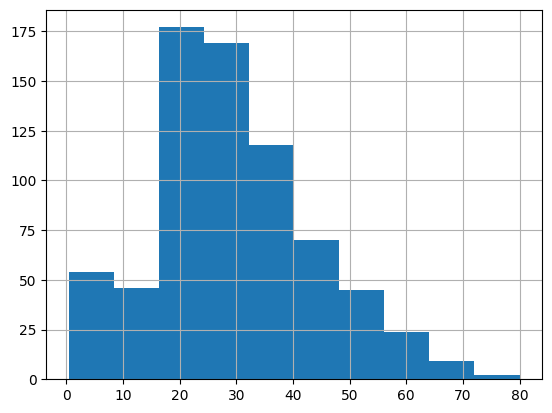

In [66]:
df['Age'].hist()

**How many passengers are there per gender?**

In [67]:
df[['Sex','PassengerId']].groupby('Sex').count()

,PassengerId
Sex,
female,314
male,577


**What is the survival rate of the Passengers per gender?**

In [68]:
df[['Survived', 'PassengerId']].groupby('Survived').count()

,PassengerId
Survived,
0,549
1,342


In [77]:
sex_gender_surv = df[['Survived', 'PassengerId', 'Sex']].groupby(['Survived', 'Sex']).count()

In [78]:
sex_gender_surv

PassengerId
Survived Sex                
0        female           81
         male            468
1        female          233
         male            109

In [99]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [101]:
sex_gender_surv = df[['PassengerId', 'Survived', 'Sex']].groupby(['Survived', 'Sex']).count()

In [103]:
no_survivor_female = sex_gender_surv.iloc[0:1]['PassengerId'].values[0]
no_survivor_male = sex_gender_surv.iloc[1:2]['PassengerId'].values[0]
survivor_female = sex_gender_surv.iloc[2:3]['PassengerId'].values[0]
survivor_male = sex_gender_surv.iloc[3:4]['PassengerId'].values[0]

In [104]:
print("Survival rate of females is : " + str(survivor_female / (no_survivor_female + survivor_female)))
print("Survival rate of males is : " + str(survivor_male / (no_survivor_male + survivor_male)))

Survival rate of females is : 0.7420382165605095
Survival rate of males is : 0.18890814558058924


**How does the survival rate of the passengers differ between classes?**

In [117]:
sex_class_surv = df[['PassengerId', 'Survived', 'Pclass']].groupby(['Survived', 'Pclass']).count()

In [118]:
sex_class_surv

PassengerId
Survived Pclass             
0        1                80
         2                97
         3               372
1        1               136
         2                87
         3               119

In [131]:
sex_class_surv_2 = sex_class_surv.reset_index().pivot(index = 'Survived', columns = 'Pclass', values = 'PassengerId')

In [132]:
sex_class_surv_2['Survival_rate_1'] = sex_class_surv_2[1] / (sex_class_surv_2[1] + sex_class_surv_2[2] + sex_class_surv_2[3])
sex_class_surv_2['Survival_rate_2'] = sex_class_surv_2[2] / (sex_class_surv_2[1] + sex_class_surv_2[2] + sex_class_surv_2[3])
sex_class_surv_2['Survival_rate_3'] = sex_class_surv_2[3] / (sex_class_surv_2[1] + sex_class_surv_2[2] + sex_class_surv_2[3])

In [133]:
sex_class_surv_2

Pclass,1,2,3,Survival_rate_1,Survival_rate_2,Survival_rate_3
Survived,,,,,,
0,80,97,372,0.145719,0.176685,0.677596
1,136,87,119,0.397661,0.254386,0.347953


## 5. Merge operation

The "merge" concept: joining two datasets that share a common attribute.

In [71]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [72]:
df_passengers = df[['PassengerId','Name','Sex','Age']]
df_ticket = df[['PassengerId','Pclass','Fare','Embarked']]

In [73]:
df_passengers.head()

,PassengerId,Name,Sex,Age
0,1,"Braund, Mr. Owen Harris",male,22.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,3,"Heikkinen, Miss. Laina",female,26.0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,5,"Allen, Mr. William Henry",male,35.0


In [63]:
df_ticket.head()

,PassengerId,Pclass,Fare,Embarked
0,1,3,7.2500,S
1,2,1,71.2833,C
2,3,3,7.9250,S
3,4,1,53.1000,S
4,5,3,8.0500,S


In [64]:
pd.merge(df_passengers,df_ticket, left_on='PassengerId',right_on='PassengerId',how='inner')

,PassengerId,Name,Sex,Age,Pclass,Fare,Embarked
0,1,"Braund, Mr. Owen Harris",male,22.0,3,7.2500,S
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,3,7.9250,S
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,53.1000,S
4,5,"Allen, Mr. William Henry",male,35.0,3,8.0500,S
...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",male,27.0,2,13.0000,S
887,888,"Graham, Miss. Margaret Edith",female,19.0,1,30.0000,S
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,3,23.4500,S
889,890,"Behr, Mr. Karl Howell",male,26.0,1,30.0000,C


In [65]:
df_passengers = df_passengers[0:3]

In [66]:
df_passengers.head()

,PassengerId,Name,Sex,Age
0,1,"Braund, Mr. Owen Harris",male,22.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,3,"Heikkinen, Miss. Laina",female,26.0


In [67]:
df_ticket = df_ticket[2:6]

In [68]:
df_ticket.head()

,PassengerId,Pclass,Fare,Embarked
2,3,3,7.9250,S
3,4,1,53.1000,S
4,5,3,8.0500,S
5,6,3,8.4583,Q


**Experiment now changing the how for left, right, inner and outer:**

In [69]:
pd.merge(df_passengers, df_ticket, left_on='PassengerId',right_on='PassengerId',how='right')

,PassengerId,Name,Sex,Age,Pclass,Fare,Embarked
0,3,"Heikkinen, Miss. Laina",female,26.0,3,7.9250,S
1,4,NaN,NaN,NaN,1,53.1000,S
2,5,NaN,NaN,NaN,3,8.0500,S
3,6,NaN,NaN,NaN,3,8.4583,Q
